In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Dataset/ai_dev_productivity.csv")

In [3]:
df.sample(10)

hours_coding  coffee_intake_mg  distractions  sleep_hours  commits  \
471          0.40                 6             1          6.4        0   
163          3.36               309             3          9.4        3   
127          3.87               380             2          3.8        7   
211          7.27               600             3          7.5        9   
145          6.56               600             1          5.7       10   
464          4.78               473             5          6.6        5   
455          3.41               397             4          7.3        1   
33           2.88               228             6          8.2        1   
23           2.15               244             4          5.3        1   
376          6.74               600             6          8.8        7   

     bugs_reported  ai_usage_hours  cognitive_load  task_success  
471              0            0.07             3.3             0  
163              0            0.07             2.1             0  
127              1            2.03             7.1             0  
211              4            1.50             4.1             0  
145              5            3.92             4.7             0  
464              0            0.86             7.1             0  
455              0            1.19             5.1             0  
33               0            1.66             3.7             0  
23               0            0.08             7.8             0  
376              0            1.84             3.8             1

# EDA

## 📊 2. Summary and Missing Values

In [4]:
## check null value
df.isna().sum()

hours_coding        0
coffee_intake_mg    0
distractions        0
sleep_hours         0
commits             0
bugs_reported       0
ai_usage_hours      0
cognitive_load      0
task_success        0
dtype: int64

In [5]:
## check null value
df.isna().sum()

hours_coding        0
coffee_intake_mg    0
distractions        0
sleep_hours         0
commits             0
bugs_reported       0
ai_usage_hours      0
cognitive_load      0
task_success        0
dtype: int64

In [6]:
df.describe()

hours_coding  coffee_intake_mg  distractions  sleep_hours    commits  \
count    500.000000        500.000000    500.000000   500.000000  500.00000   
mean       5.015600        463.192000      2.976000     6.975800    4.60800   
std        1.947253        142.334991      1.678409     1.455965    2.70499   
min        0.000000          6.000000      0.000000     3.000000    0.00000   
25%        3.600000        369.500000      2.000000     6.100000    3.00000   
50%        5.030000        500.500000      3.000000     6.950000    5.00000   
75%        6.275000        600.000000      4.000000     7.900000    6.00000   
max       12.000000        600.000000      8.000000    10.000000   13.00000   

       bugs_reported  ai_usage_hours  cognitive_load  task_success  
count     500.000000      500.000000      500.000000    500.000000  
mean        0.858000        1.510920        4.498200      0.606000  
std         1.102846        1.085557        1.868861      0.489124  
min         0.000000        0.000000        1.000000      0.000000  
25%         0.000000        0.697500        3.175000      0.000000  
50%         0.000000        1.260000        4.400000      1.000000  
75%         2.000000        2.070000        5.800000      1.000000  
max         5.000000        6.360000       10.000000      1.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      500 non-null    float64
 1   coffee_intake_mg  500 non-null    int64  
 2   distractions      500 non-null    int64  
 3   sleep_hours       500 non-null    float64
 4   commits           500 non-null    int64  
 5   bugs_reported     500 non-null    int64  
 6   ai_usage_hours    500 non-null    float64
 7   cognitive_load    500 non-null    float64
 8   task_success      500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
# Check data types and missing values
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
# Basic statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      500 non-null    float64
 1   coffee_intake_mg  500 non-null    int64  
 2   distractions      500 non-null    int64  
 3   sleep_hours       500 non-null    float64
 4   commits           500 non-null    int64  
 5   bugs_reported     500 non-null    int64  
 6   ai_usage_hours    500 non-null    float64
 7   cognitive_load    500 non-null    float64
 8   task_success      500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None

Missing values:
 hours_coding        0
coffee_intake_mg    0
distractions        0
sleep_hours         0
commits             0
bugs_reported       0
ai_usage_hours      0
cognitive_load      0
task_success        0
dtype: int64


hours_coding  coffee_intake_mg  distractions  sleep_hours    commits  \
count    500.000000        500.000000    500.000000   500.000000  500.00000   
mean       5.015600        463.192000      2.976000     6.975800    4.60800   
std        1.947253        142.334991      1.678409     1.455965    2.70499   
min        0.000000          6.000000      0.000000     3.000000    0.00000   
25%        3.600000        369.500000      2.000000     6.100000    3.00000   
50%        5.030000        500.500000      3.000000     6.950000    5.00000   
75%        6.275000        600.000000      4.000000     7.900000    6.00000   
max       12.000000        600.000000      8.000000    10.000000   13.00000   

       bugs_reported  ai_usage_hours  cognitive_load  task_success  
count     500.000000      500.000000      500.000000    500.000000  
mean        0.858000        1.510920        4.498200      0.606000  
std         1.102846        1.085557        1.868861      0.489124  
min         0.000000        0.000000        1.000000      0.000000  
25%         0.000000        0.697500        3.175000      0.000000  
50%         0.000000        1.260000        4.400000      1.000000  
75%         2.000000        2.070000        5.800000      1.000000  
max         5.000000        6.360000       10.000000      1.000000

## 🔍 3. Univariate Analysis

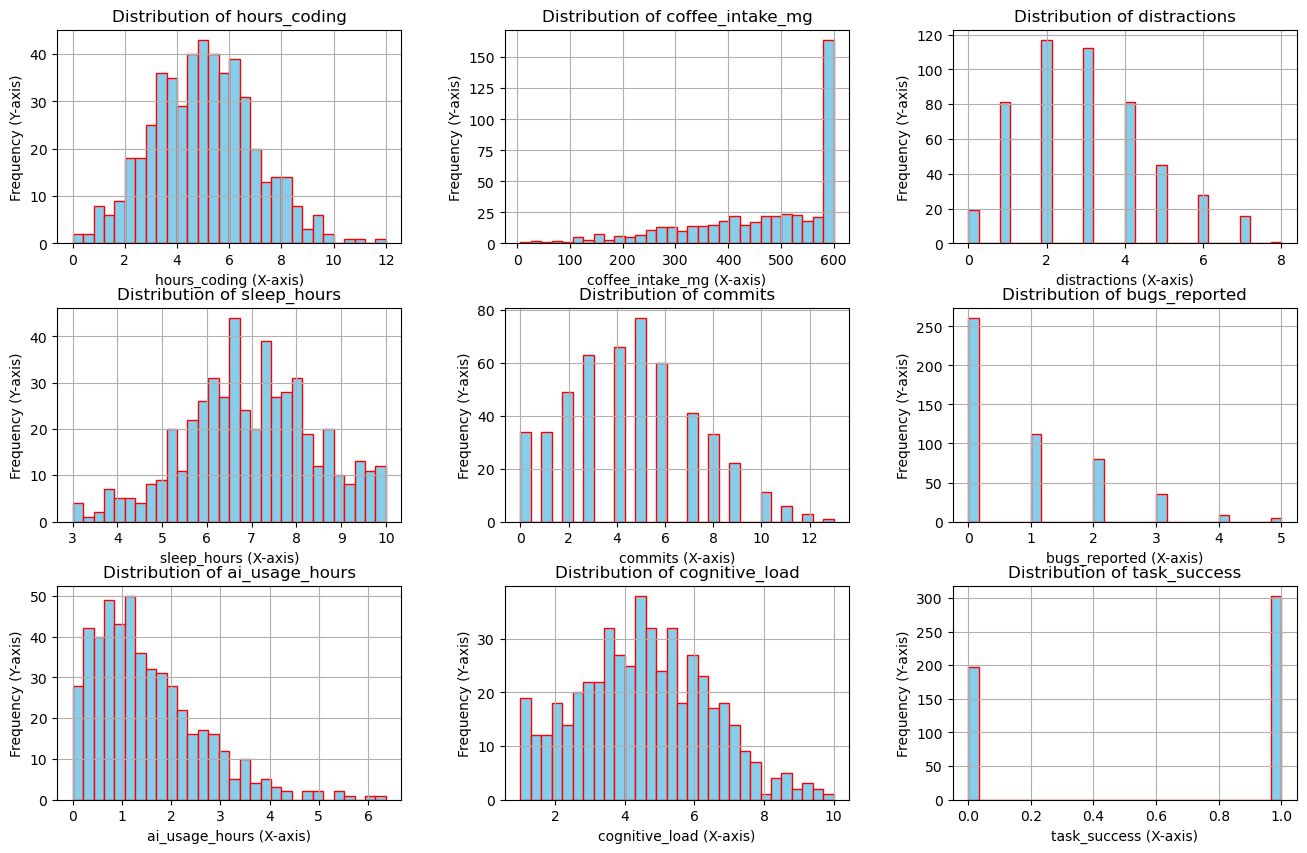

In [9]:
numeric_col = df.select_dtypes(include=np.number).columns

# Histogram for each numeric column
axes = df[numeric_col].hist(bins=30, figsize=(16,10), color='skyblue', edgecolor='red')
# plt.tight_layout()

# Add X and Y labels
for ax, col in zip(axes.flatten(), numeric_col):
    ax.set_xlabel(f'{col} (X-axis)')
    ax.set_ylabel('Frequency (Y-axis)')
    ax.set_title(f'Distribution of {col}')

plt.show()


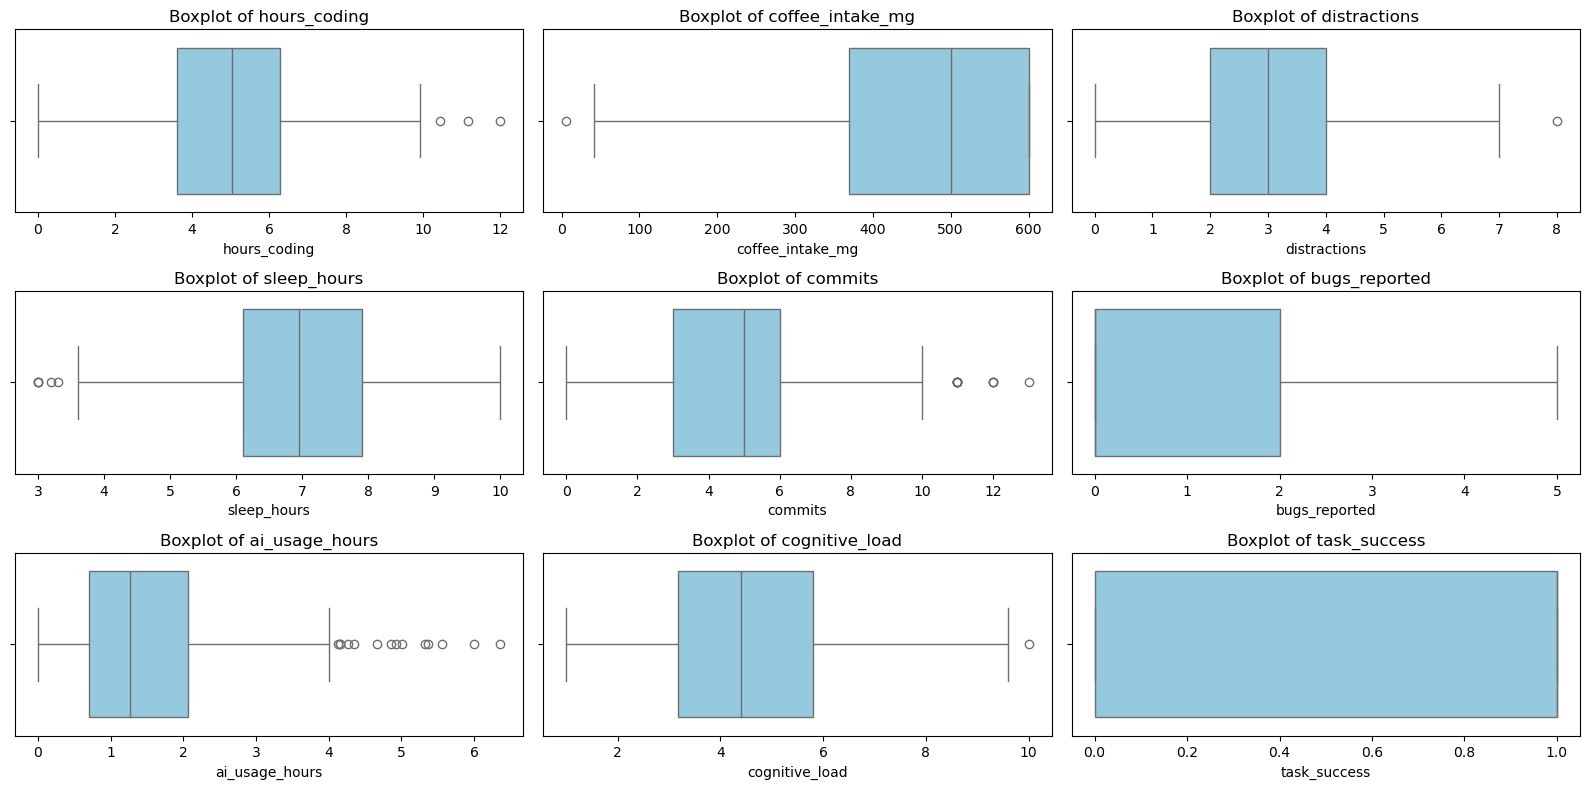

In [10]:
plt.figure(figsize=(16, 8))
for i, c in enumerate(numeric_col):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[c], color='skyblue')
    plt.xlabel(c)  # Set x-axis label
    plt.title(f'Boxplot of {c}')  # Optional: set a title for clarity

plt.tight_layout()
plt.show()


## 🔁 4. Correlation Heatmap

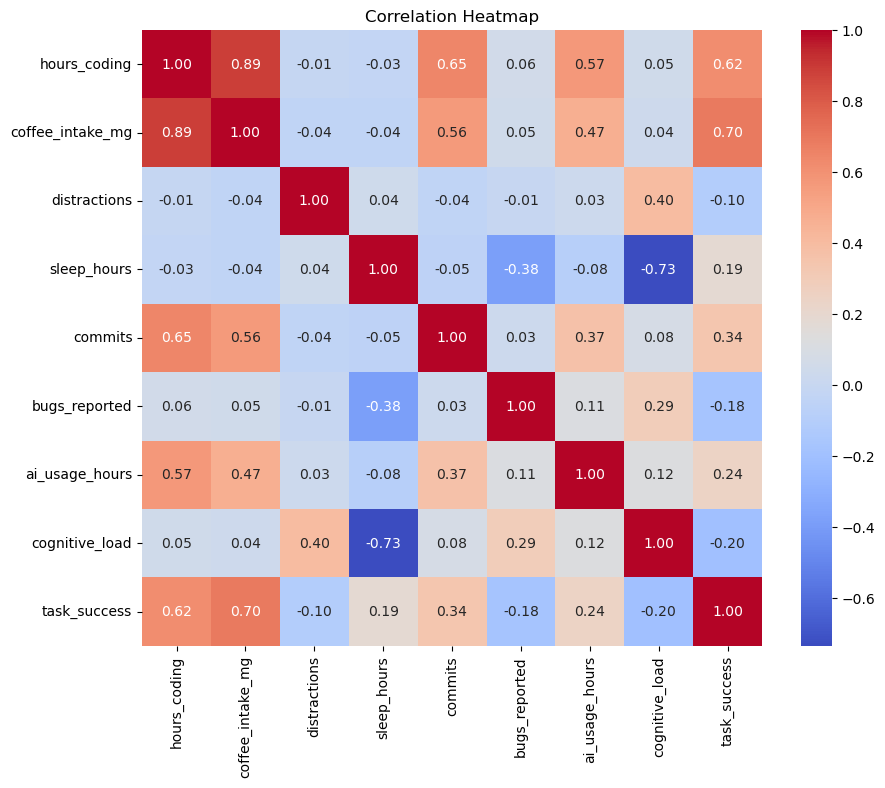

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## 📉 5. Bivariate Plots

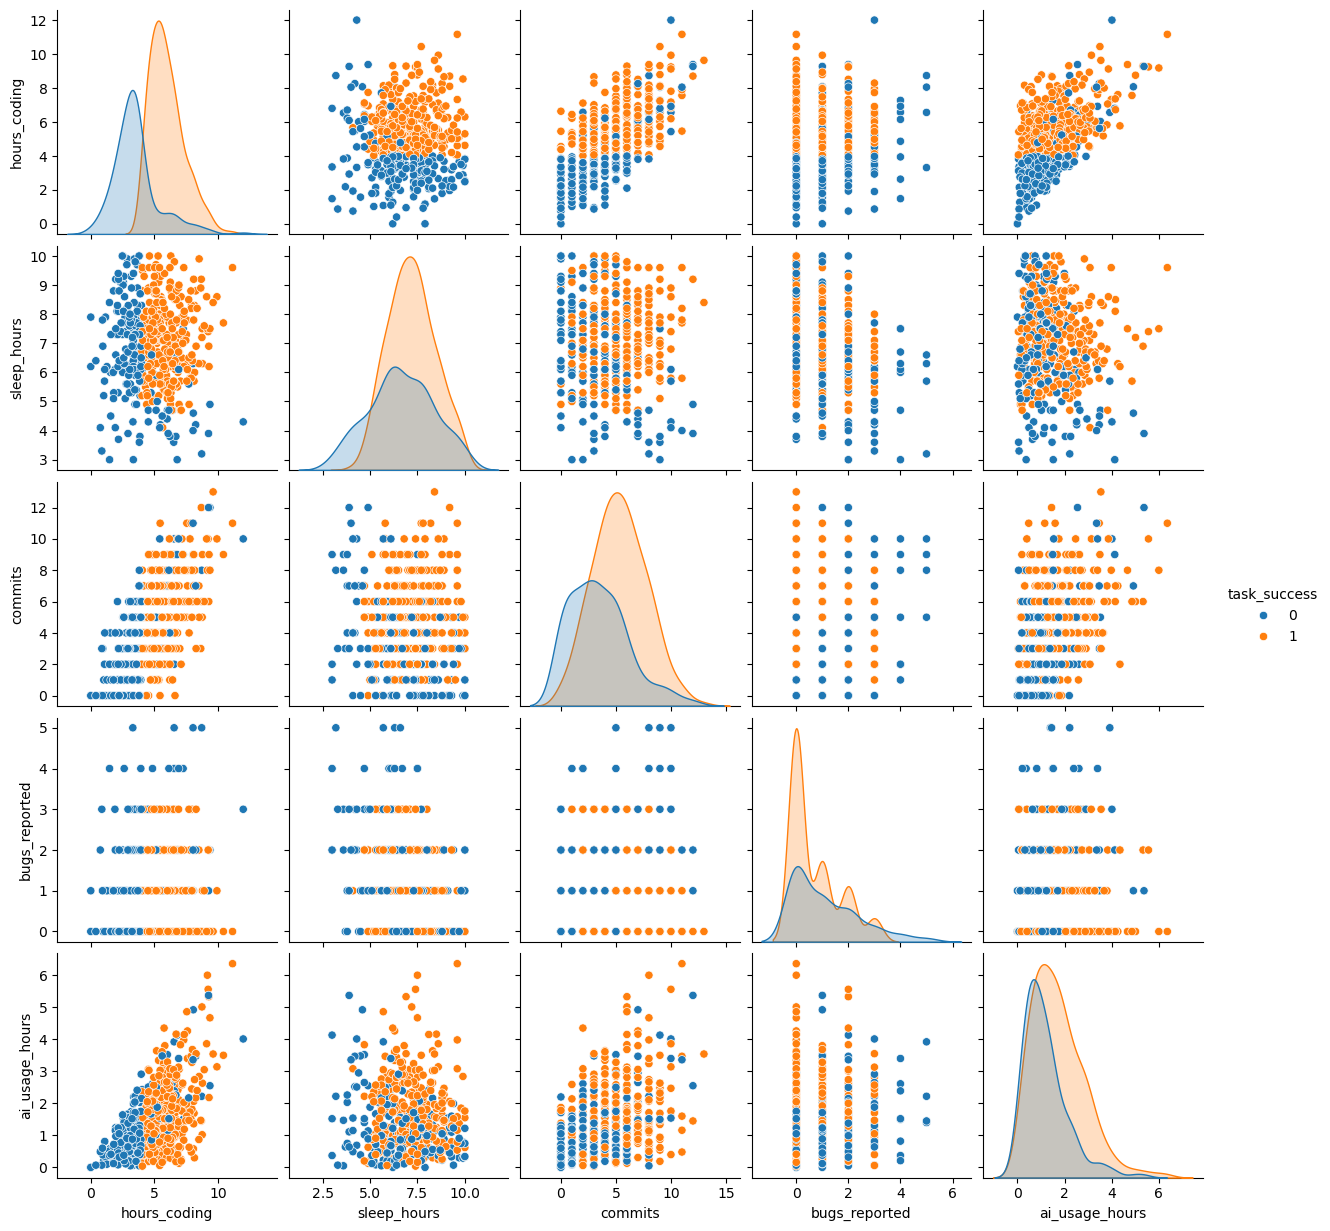

In [12]:
# Pairplot of selected features colored by task_success
selected_features = ['hours_coding', 'sleep_hours', 'commits', 'bugs_reported', 'ai_usage_hours', 'task_success']
sns.pairplot(df[selected_features], hue='task_success')
plt.show()

## 📊 6. Feature vs. Task Success (Boxplots)

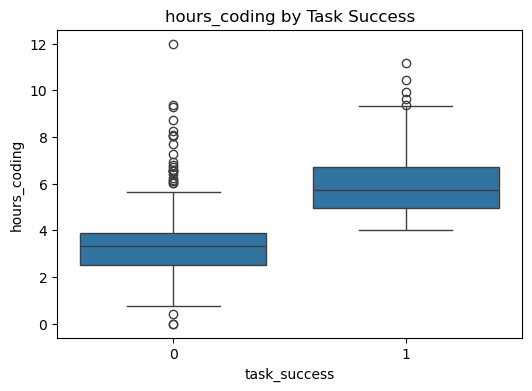

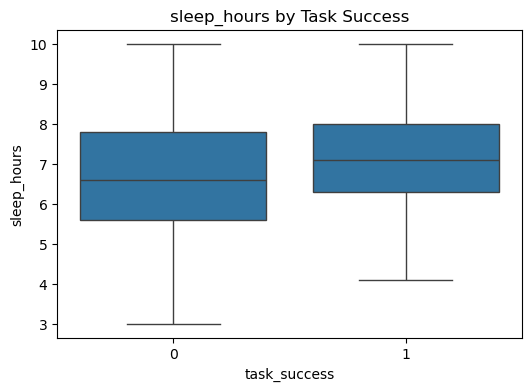

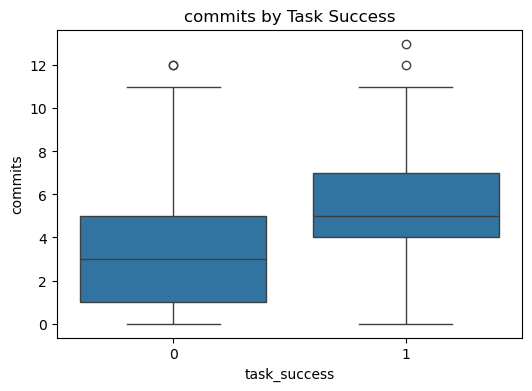

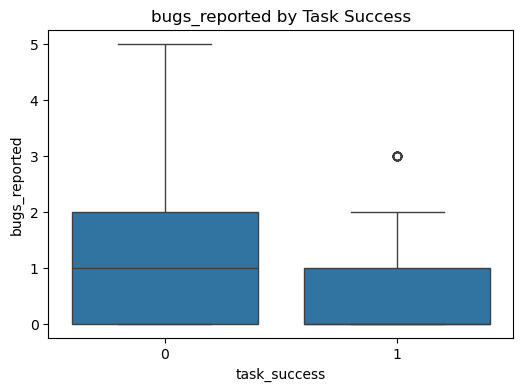

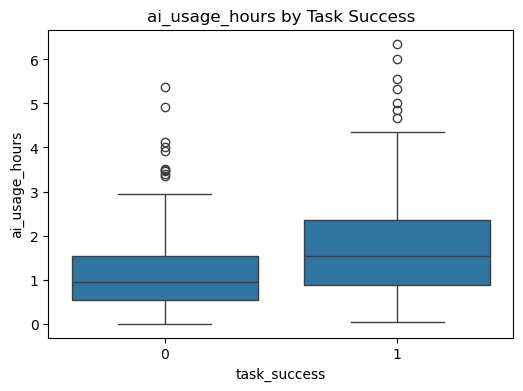

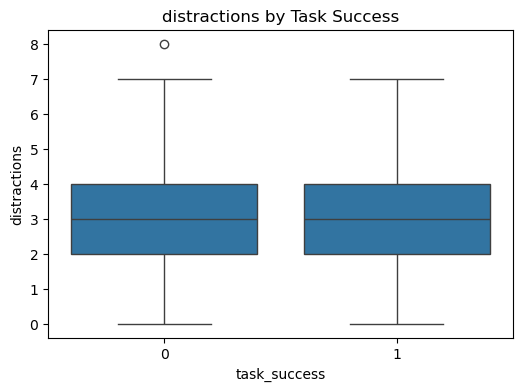

In [13]:
features_to_plot = ['hours_coding', 'sleep_hours', 'commits', 'bugs_reported', 'ai_usage_hours', 'distractions']
for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='task_success', y=feature, data=df)
    plt.title(f'{feature} by Task Success')
    plt.show()

## 📈 7. Scatter Plots with Trendlines

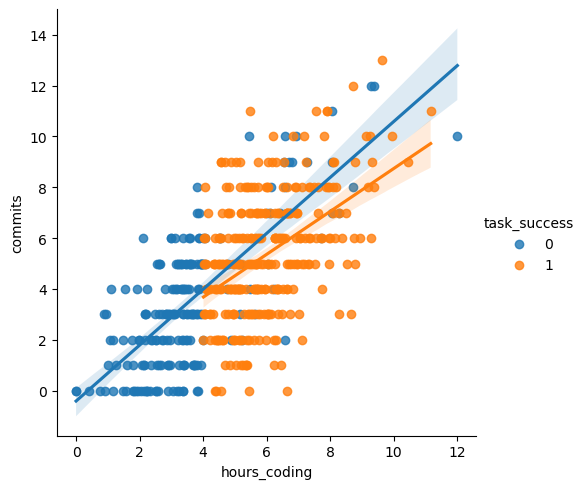

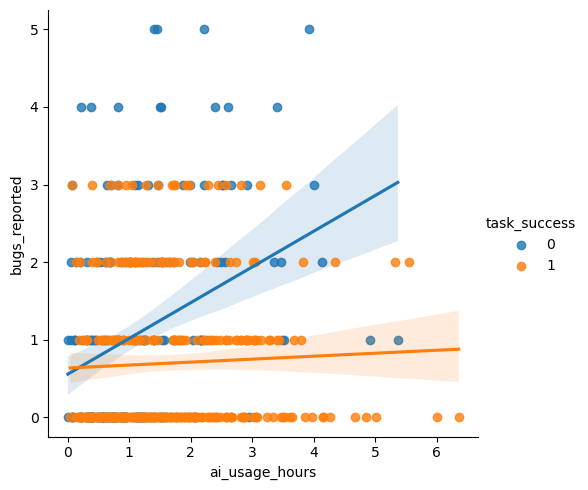

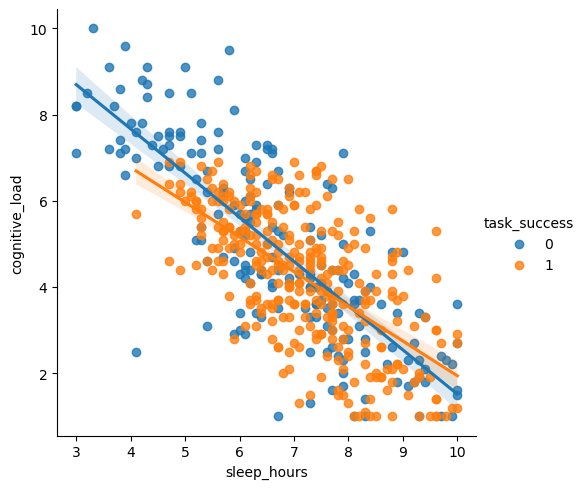

In [14]:
sns.lmplot(x='hours_coding', y='commits', hue='task_success', data=df)
sns.lmplot(x='ai_usage_hours', y='bugs_reported', hue='task_success', data=df)
sns.lmplot(x='sleep_hours', y='cognitive_load', hue='task_success', data=df)


## 🧮 8. Group-wise Mean Analysis

In [15]:
# Compare feature averages for success vs failure
group_stats = df.groupby('task_success').mean()
group_stats

hours_coding  coffee_intake_mg  distractions  sleep_hours  \
task_success                                                              
0                 3.530609        340.598985      3.192893     6.639086   
1                 5.981089        542.897690      2.834983     7.194719   

               commits  bugs_reported  ai_usage_hours  cognitive_load  
task_success                                                           
0             3.472081       1.101523        1.185888        4.960914  
1             5.346535       0.699670        1.722244        4.197360

## 🌟 9. Interactive Plot (Optional)

In [16]:
import plotly.express as px
fig = px.scatter(df, x='hours_coding', y='commits', color='task_success',
                 size='ai_usage_hours', hover_data=['sleep_hours', 'bugs_reported'])
fig.show()


# ✅ 1. Baseline (Simple Models)

| Model                  | Notes                                                                 |
|------------------------|-----------------------------------------------------------------------|
| **Logistic Regression**| Good for baseline and interpretability. May not reach 92% alone.      |
| **K-Nearest Neighbors (KNN)** | Simple but sensitive to scaling and noise. Try with feature scaling. |
| **Naive Bayes**        | Fast and simple, but assumes feature independence which may not hold. |

---

## ✅ Binary Classification with Logistic Regression

In [17]:
# import libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [18]:
df


hours_coding  coffee_intake_mg  distractions  sleep_hours  commits  \
0            5.99               600             1          5.8        2   
1            4.72               568             2          6.9        5   
2            6.30               560             1          8.9        2   
3            8.05               600             7          6.3        9   
4            4.53               421             6          6.9        4   
..            ...               ...           ...          ...      ...   
495          6.08               594             1          5.3        3   
496          2.93               382             2          6.7        3   
497          4.62               494             4          7.5        2   
498          3.25               296             6          6.9        1   
499          2.23               252             4          8.8        0   

     bugs_reported  ai_usage_hours  cognitive_load  task_success  
0                1            0.71             5.4             1  
1                3            1.75             4.7             1  
2                0            2.27             2.2             1  
3                5            1.40             5.9             0  
4                0            1.26             6.3             1  
..             ...             ...             ...           ...  
495              0            0.91             6.8             1  
496              2            1.38             5.9             0  
497              0            0.41             4.5             1  
498              0            1.52             6.3             0  
499              0            1.05             2.6             0  

[500 rows x 9 columns]

In [19]:
## select to see target column and other columns
df['task_success']

0      1
1      1
2      1
3      0
4      1
      ..
495    1
496    0
497    1
498    0
499    0
Name: task_success, Length: 500, dtype: int64

In [20]:
# Define features (X) and target (y)
X = df.drop(columns=['task_success'])
y = df['task_success']

## 🔀 3. Train-Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)


## 🧠 4. Train Logistic Regression Model

In [22]:
# Initialize and fit the model
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


## 📊 5. Evaluate Model

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.79      0.85        39
           1       0.88      0.95      0.91        61

    accuracy                           0.89       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.89      0.89      0.89       100



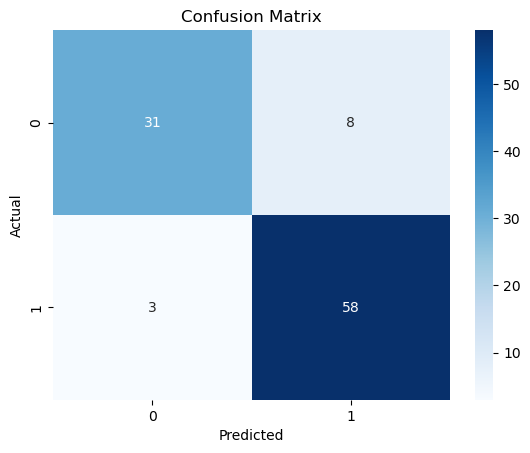

Accuracy Score: 0.8900
ROC-AUC Score: 0.9567


In [23]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Accuracy & ROC-AUC
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba):.4f}")


## 📈 6. ROC Curve

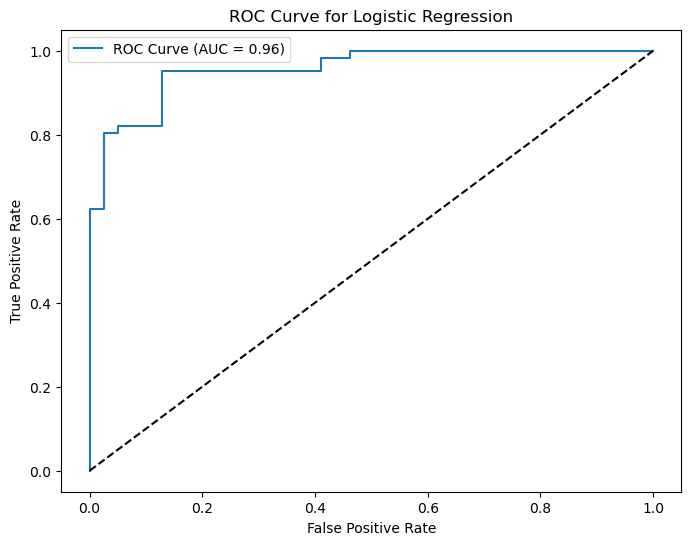

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()


## 📌 Check Feature Importance

In [25]:
# Coefficients of the model
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coeff_df)

            Feature  Coefficient
7    cognitive_load    -0.803681
5     bugs_reported    -0.803159
3       sleep_hours    -0.525926
6    ai_usage_hours    -0.377179
0      hours_coding     0.331888
4           commits    -0.067124
2      distractions     0.041107
1  coffee_intake_mg     0.017842


In [26]:
def predict_user_input(model):
    print("\n--- Enter Developer Stats for Prediction Binary Classification With Logistic Regression ---")

    # Ask user to input feature values
    try:
        hours_coding = float(input("Hours Coding: "))
        coffee_intake_mg = float(input("Coffee Intake (mg): "))
        distractions = int(input("Distractions (count): "))
        sleep_hours = float(input("Sleep Hours: "))
        commits = int(input("Commits: "))
        bugs_reported = int(input("Bugs Reported: "))
        ai_usage_hours = float(input("AI Usage Hours: "))
        cognitive_load = float(input("Cognitive Load (1-10 scale): "))

        # Create DataFrame for input
        user_data = pd.DataFrame([[
            hours_coding, coffee_intake_mg, distractions, sleep_hours,
            commits, bugs_reported, ai_usage_hours, cognitive_load
        ]], columns=[
            'hours_coding', 'coffee_intake_mg', 'distractions', 'sleep_hours',
            'commits', 'bugs_reported', 'ai_usage_hours', 'cognitive_load'
        ])

        # Predict
        prediction = model.predict(user_data)[0]
        probability = model.predict_proba(user_data)[0][1]

        # Output
        print("\n✅ Prediction Result:")
        if prediction == 1:
            print(f"The task is likely to be SUCCESSFUL with probability {probability:.2f}")
        else:
            print(f"The task is likely to FAIL with probability {1 - probability:.2f}")
    except Exception as e:
        print("❌ Error in input:", e)


In [27]:
#### predict_user_input(model)


--- Enter Developer Stats for Prediction ---


Hours Coding:  6
Coffee Intake (mg):  400
Distractions (count):  2
Sleep Hours:  7
Commits:  5
Bugs Reported:  1
AI Usage Hours:  2
Cognitive Load (1-10 scale):  4



✅ Prediction Result:
The task is likely to FAIL with probability 0.51


In [28]:
df.sample(2)

hours_coding  coffee_intake_mg  distractions  sleep_hours  commits  \
492          5.15               503             2          8.8        9   
8            4.06               409             5          6.1        6   

     bugs_reported  ai_usage_hours  cognitive_load  task_success  
492              1            2.32             1.8             1  
8                2            2.43             7.0             0


# 🚀 2. Tree-Based Models (High Potential for 92%+)

| Model                  | Notes                                                                 |
|------------------------|-----------------------------------------------------------------------|
| **Decision Tree**      | Easy to interpret but prone to overfitting. Good base test.           |
| **Random Forest**      | Ensemble of decision trees. Robust and likely to get 90–92% with tuning. |
| **Gradient Boosting Machines (GBM)** | Strong performance; slow to train but very powerful.      |
| **XGBoost**            | Highly optimized GBM. Try this—can easily cross 92% with tuning.       |
| **LightGBM**           | Faster than XGBoost, also accurate. Good for large feature sets.       |
| **CatBoost**           | Great with categorical data and small datasets. Try it as well.        |

---

# 🧠 3. SVM and Linear Models

| Model                  | Notes                                                                 |
|------------------------|-----------------------------------------------------------------------|
| **Support Vector Machine (SVM)** | Very strong, especially with kernels. Try RBF kernel. May reach >92% with scaling and tuning. |
| **Ridge / Lasso / ElasticNet** | Variants of linear models with regularization. Good for testing but not likely to hit 92%. |

---

# ⚙️ 4. Neural Networks

| Model                  | Notes                                                                 |
|------------------------|-----------------------------------------------------------------------|
| **MLPClassifier (Sklearn)** | Basic feedforward NN. Can work well with enough tuning.            |
| **Keras/TensorFlow Neural Net** | More flexibility and tuning options; possible to reach >92%.     |
| **AutoML (TPOT, AutoSklearn)** | Let tools find the best pipeline for you automatically. High chance of hitting 92%+. |

---

# 📈 Recommendation: Try This Shortlist First

- ✅ **RandomForestClassifier**
- ✅ **XGBoostClassifier**
- ✅ **LightGBMClassifier**
- ✅ **SVM with RBF kernel**
- ✅ **MLPClassifier (Neural Network)**
